# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import cv2

# Based on the location of the saved training, validation and testing data

training_file = "data/train.p"
validation_file = "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train_nh = train['features'], train['labels']
X_valid, y_valid_nh = valid['features'], valid['labels']
X_test, y_test_nh = test['features'], test['labels']

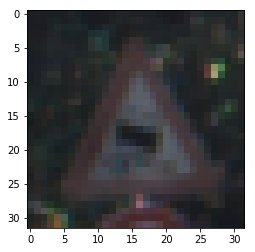

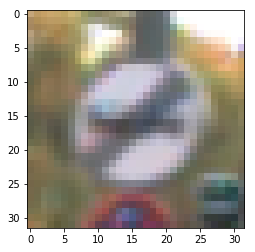

In [2]:
import matplotlib.pyplot as plt

# Sample Visualization shown here.

%matplotlib inline
plt.figure()
plt.imshow(X_train[2000])
plt.figure()
plt.imshow(X_train[100])

### ---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### A Basic Summary of the Data Set

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# The shape of an traffic sign image
image_shape = X_train.shape[1:4]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)


### Pre-Processing: 

### Grayscaling

In [4]:
from skimage import color
from sklearn.utils import shuffle

# Grayscaling

X_train = np.asarray([color.rgb2gray(X_train[i]) for i in range(n_train)])
X_valid = np.asarray([color.rgb2gray(X_valid[i]) for i in range(n_validation)])
X_test = np.asarray([color.rgb2gray(X_test[i]) for i in range(n_test)])

# Verifying no. of samples after Grayscaling
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32)
(4410, 32, 32)
(12630, 32, 32)


### Normalizing training, testing and validation data
#### Minimally, the image data should be normalized so that the data has mean zero and equal variance.

In [5]:
X_train = ((X_train-0.5)/0.5)
X_valid = ((X_valid-0.5)/0.5)
X_test = ((X_test-0.5)/0.5)

In [6]:
# Total no. of classes

n_classes = y_train_nh.max()+1
print(n_classes)

43


### Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

Mean: 809.279069767


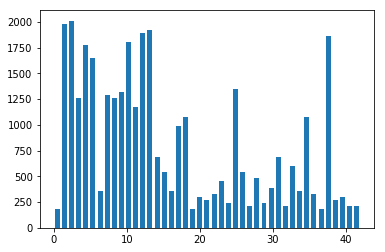

In [7]:
# histogram of label frequency
hist, bins = np.histogram(y_train_nh, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
print('Mean:',np.mean(hist))
plt.bar(center, hist, align='center', width=width)
plt.show()

### Random samples added to underepresented classes

In [8]:
# improving training data
import os.path
if os.path.isfile("Training_data_label.npz"):
    training_x_y = np.load("Training_data_label.npz")
    X_train = training_x_y['X_train']
    y_train_nh = training_x_y['y_train_nh']
else:
    average_samples = 800
    for class_i in range(n_classes):
        class_indices = np.where(y_train_nh==class_i)[0]
        n_samples = len(class_indices)
        if n_samples <= average_samples:
            for i in range(average_samples-n_samples):
                print(class_i, i*100/(average_samples-n_samples), end='\r', flush=True)
                new_img = X_train[class_indices[i%n_samples]]
                X_train = np.append(X_train, [new_img], axis=0)
                y_train_nh = np.hstack([y_train_nh, class_i])
    print("Completed...")
    np.savez("Training_data_label.npz", X_train=X_train, y_train_nh=y_train_nh)

### Hot-Encoding

In [9]:
def encoder(data):
    n_data = data.shape[0]
    n_classes = len(list(range(data.min(), data.max()+1)))
    output = np.zeros((n_data, n_classes))
    for i in range(0, n_data):
        output[i][data[i]] = 1
    return output

In [10]:
y_train = encoder(y_train_nh)
y_valid = encoder(y_valid_nh)
y_test = encoder(y_test_nh)

In [11]:
# Number of training examples
n_train = X_train.shape[0]
# How many unique classes/labels there are in the dataset.
n_classes = y_train[0].shape[0]
print("Number of training examples =", n_train)
print("Number of classes = ", n_classes)

Number of training examples = 46480
Number of classes =  43


### Exploratory visualization of the modified dataset

### A histogram showing the Training dataset after the classes which were underrepresented with less samples where added with randomised samples, so that those classes dont fall behind while training.

1080.93023256


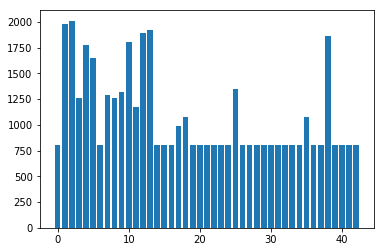

In [12]:
y_training_hist = np.sum(y_train, axis=0)
plt.bar(np.arange(0,43),y_training_hist)
# print(y_training_hist)
print(np.mean(y_training_hist))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Model Architecture

#### LeNet-5: 

In [13]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.5
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Model used for the project : Net

In [14]:
def Net(x,lf1 = 8,lf2 = 16,lf3 = 32, lf4 = 32):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Reshape from 2D to 4D. This prepares the data for convolutional and pooling layers.
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x8.
    W_C1=tf.Variable(tf.truncated_normal((5,5,1,lf1),mu,sigma))
    B_C1=tf.Variable(tf.zeros(lf1,1))
    C1=tf.nn.conv2d(x,W_C1,[1,1,1,1],'VALID')+B_C1
    
    AC1=tf.nn.relu(C1)
    
    # Layer 2: Input = 28x28x8. Output = 24x24x16.
    W_C2=tf.Variable(tf.truncated_normal((5,5,lf1,lf2),mu,sigma))
    B_C2=tf.Variable(tf.zeros(lf2,1))
    C2=tf.nn.conv2d(AC1,W_C2,[1,1,1,1],'VALID')+B_C2
    AC2=tf.nn.relu(C2)
    
    # Input = 24x24x16. Output = 12x12x16
    P1=tf.nn.max_pool(AC2,[1,2,2,1],[1,2,2,1],'VALID')
    
    DROP1=tf.nn.dropout(P1,keep_prob = 0.8)
    
    # Layer 3: Input = 12x12x16. Output = 10x10x32.
    W_C3=tf.Variable(tf.truncated_normal((3,3,lf2,lf3),mu,sigma))
    B_C3=tf.Variable(tf.zeros(lf3,1))
    C3=tf.nn.conv2d(DROP1,W_C3,[1,1,1,1],'VALID')+B_C3
    # Activation.
    AC3=tf.nn.relu(C3)
    
    # Layer 4: Input = 10x10x32. Output = 8x8x32.
    W_C4=tf.Variable(tf.truncated_normal((3,3,lf3,lf4),mu,sigma))
    B_C4=tf.Variable(tf.zeros(lf4,1))
    C4=tf.nn.conv2d(AC3,W_C4,[1,1,1,1],'VALID')+B_C4
    # Activation.
    AC4=tf.nn.relu(C4)
    
    # Input = 8x8x32. Output = 4x4x32
    P2=tf.nn.max_pool(AC4,[1,2,2,1],[1,2,2,1],'VALID')

    # Flatten. Input = 4x4x32. Output = 512.
    FL = tf.contrib.layers.flatten(P2,[1,4*4*lf4])

    # Fully connected Layer 1: Input = 512. Output = 120
    W_FC1=tf.Variable(tf.truncated_normal((4*4*lf4,120),mu,sigma))
    B_FC1=tf.Variable(tf.zeros(120,1))
    FC1 = (tf.matmul(FL,W_FC1)+B_FC1)
    # Activation.
    AC4=tf.nn.relu(FC1)

    DROP3=tf.nn.dropout(AC4,keep_prob = 0.5)
    
    # Fully connected Layer 2 : Input = 120. Output = 84.
    W_FC2=tf.Variable(tf.truncated_normal((120,84),mu,sigma))
    B_FC2=tf.Variable(tf.zeros(84,1))
    FC2 = (tf.matmul(DROP3,W_FC2)+B_FC2)
    # Activation.
    AC5=tf.nn.relu(FC2)
    
    # Fully Connected Layer 3 : Input = 84. Output = 43.
    W_FC3=tf.Variable(tf.truncated_normal((84,43),mu,sigma))
    B_FC3=tf.Variable(tf.zeros(43,1))
    FC3 = (tf.matmul(AC5,W_FC3)+B_FC3)
    
    logits=FC3
    
    return logits


### Setting Epochs and Batch size

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None, n_classes))


EPOCHS = 15
BATCH_SIZE = 128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Training model here.

rate = 0.001

logits = Net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
### Calculate and report the accuracy on the training and validation set.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        n = batch_x.shape[0]
        batch_x = batch_x.reshape(n,32,32,1)
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Validation set Accuracy and A plot of accuracy saturation

Training...

EPOCH 1 ...
Training Accuracy: 0.80
Validation Accuracy = 0.764
EPOCH 2 ...
Training Accuracy: 0.89
Validation Accuracy = 0.854
EPOCH 3 ...
Training Accuracy: 0.92
Validation Accuracy = 0.883
EPOCH 4 ...
Training Accuracy: 0.94
Validation Accuracy = 0.897
EPOCH 5 ...
Training Accuracy: 0.95
Validation Accuracy = 0.902
EPOCH 6 ...
Training Accuracy: 0.96
Validation Accuracy = 0.922
EPOCH 7 ...
Training Accuracy: 0.96
Validation Accuracy = 0.930
EPOCH 8 ...
Training Accuracy: 0.97
Validation Accuracy = 0.932
EPOCH 9 ...
Training Accuracy: 0.97
Validation Accuracy = 0.943
EPOCH 10 ...
Training Accuracy: 0.97
Validation Accuracy = 0.935
EPOCH 11 ...
Training Accuracy: 0.98
Validation Accuracy = 0.941
EPOCH 12 ...
Training Accuracy: 0.98
Validation Accuracy = 0.944
EPOCH 13 ...
Training Accuracy: 0.98
Validation Accuracy = 0.952
EPOCH 14 ...
Training Accuracy: 0.98
Validation Accuracy = 0.955
EPOCH 15 ...
Training Accuracy: 0.98
Validation Accuracy = 0.953
Model saved!


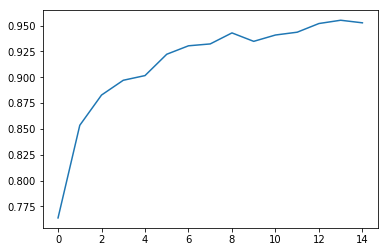

In [18]:
validation_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            n = batch_x.shape[0]
            batch_x = batch_x.reshape(n,32,32,1)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        validation_accuracy.append(evaluate(X_valid, y_valid))
        print("EPOCH {} ...".format(i+1))
        print('Training Accuracy: {:.2f}'.format(evaluate(X_train,y_train)))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
    saver.save(sess, './lenet')
    print("Model saved!")

plt.plot(np.arange(EPOCHS), validation_accuracy)
plt.show()

### Test-set accuracy

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(Test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.928


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

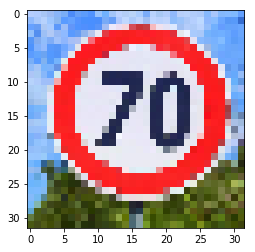

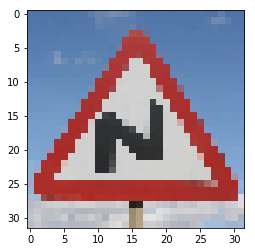

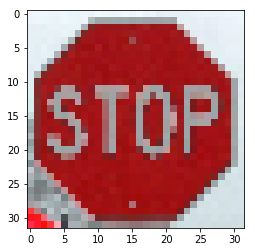

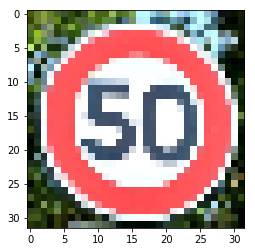

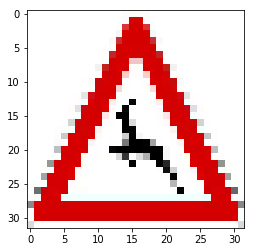

In [20]:
import glob

images = [cv2.resize(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB), (32,32)) for path in glob.glob('images/*.jpg')]
test_images=np.asarray([(color.rgb2gray(cv2.resize(cv2.imread(path), (32,32)))-0.5)/0.5 for path in glob.glob('images/*.jpg')]).astype("float32")
test_images = test_images.reshape(5,32,32,1)
for i in range(len(images)):
    plt.figure()
    plt.imshow(images[i])

### Predict the Sign Type for Each Image

In [21]:
import pandas as pd
signnames = pd.read_csv("signnames.csv")
print(signnames)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Same trained model used here

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(logits, feed_dict={x:test_images})
    print(signnames["SignName"][np.argmax(prediction, axis=1)])
    predicted_array = np.argmax(prediction, axis=1)

INFO:tensorflow:Restoring parameters from ./lenet
4      Speed limit (70km/h)
23            Slippery road
1      Speed limit (30km/h)
2      Speed limit (50km/h)
31    Wild animals crossing
Name: SignName, dtype: object


### Softmax Probabiltity Calculation

In [23]:
prediction_probability = np.asarray([np.exp(prediction[i])/np.sum(np.exp(prediction[i])) for i in range(prediction.shape[0])])

### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
web_images_label_ID = [4, 21, 14, 2, 31]
correct_pred = len(predicted_array[predicted_array==web_images_label_ID])
Accuracy_in_web_prediction = correct_pred/len(web_images_label_ID)*100
print("Accuracy in prediction of 5 web images: {} %.".format(Accuracy_in_web_prediction))

Accuracy in prediction of 5 web images: 60.0 %.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 


with tf.Session() as sess:
    most_probable = sess.run(tf.nn.top_k(tf.constant(prediction_probability), k=5))

print("The Top 5 most probable predictions are :")
print(most_probable[1])
print(" ")
print("Top five softmax probabilities of the predictions are :")
print(most_probable[0].round(4))

The Top 5 most probable predictions are :
[[ 4  1 39 26  0]
 [23 30 24 19 11]
 [ 1  2 13 25  4]
 [ 2  3 13  5  1]
 [31 37  2 21  1]]
 
Top five softmax probabilities of the predictions are :
[[  9.99899983e-01   9.99999975e-05   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  8.47999990e-01   8.48999992e-02   3.59000005e-02   2.76999995e-02
    2.70000007e-03]
 [  9.96299982e-01   3.50000011e-03   9.99999975e-05   9.99999975e-05
    0.00000000e+00]
 [  9.92399991e-01   7.19999988e-03   1.99999995e-04   1.99999995e-04
    0.00000000e+00]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 